# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [2]:
absences = pd.read_csv("../data/absences.csv", index_col=0)
absences.head()

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9


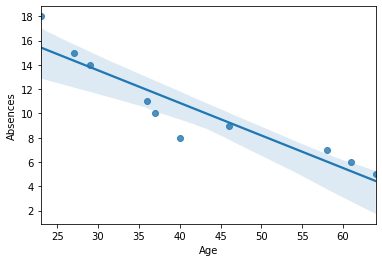

In [3]:
# your code here
sns.regplot(data=absences, x="Age", y="Absences")
plt.show()

In [4]:
# your comments here
"""
Young people have a higher chance of not going to work rather than old people.
"""

'\nYoung people have a higher chance of not going to work rather than old people.\n'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [4]:
# your code here
def slope_intercept_calculator(df_a, df_b):
    a_mean = np.mean(df_a)
    b_mean = np.mean(df_b)

    xi_x = np.array([a - a_mean for a in df_a])
    yi_y = np.array([b - b_mean for b in df_b])

    slope = np.sum(xi_x * yi_y) / np.sum(np.array([(a - a_mean)**2 for a in df_a]))

    intercept = b_mean - slope*a_mean
    
    return slope, intercept

In [5]:
slope_intercept_calculator(absences["Age"], absences["Absences"])

(-0.2681088337033404, 21.58738189891063)

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [6]:
# your code here
slope_intercept_calculator(absences["Age"], absences["Absences"])

(-0.2681088337033404, 21.58738189891063)

In [8]:
# your comments here
"""
Negative slope as the absences tends to go down as the age increases.
"""

'\nNegative slope as the absences tends to go down as the age increases.\n'

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [7]:
# your code here
def covariance_correlation_calculatior(df_a, df_b):
    age_mean = np.mean(df_a)
    absences_mean = np.mean(df_b)
    
    xi_x = np.array([a - age_mean for a in df_a])
    yi_y = np.array([b - absences_mean for b in df_b])
    covariance = np.sum(xi_x * yi_y)/(len(df_a)-1)
    
    correlation = np.sum(xi_x * yi_y)/np.sqrt(np.sum(xi_x**2) * np.sum(yi_y**2))
    
    return covariance, correlation

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [8]:
# your code here
covariance_correlation_calculatior(absences["Age"], absences["Absences"])

(-57.699999999999996, -0.9325434092481012)

In [11]:
# your comments here
"""
Negative covariance as the go in different directions (goes down when they age goes up).
Also, as they go in different directions there's why it's almost a perfect negative correlation
"""

"\nNegative covariance as the go in different directions (goes down when they age goes up).\nAlso, as they go in different directions there's why it's almost a perfect negative correlation\n"

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [12]:
# your comments here
"""
Young people is more likely to don't come to work. As age increase, this trend decreases.
"""

"\nYoung people is more likely to don't come to work. As age increase, this trend decreases.\n"

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [20]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [10]:
# your code here
covariance_correlation_calculatior(ironbeers_df["X"], ironbeers_df["Y"])

(12.0, 0.9770084209183943)

In [15]:
# your comments here
"""
The covariance is positive because the more people you tell to stay, they more likely they will.
Also, the correlation is almost perfect because they go on the same direction
"""

'\nThe covariance is positive because the more people you tell to stay, they more likely they will.\nAlso, the correlation is almost perfect because they go on the same direction\n'

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

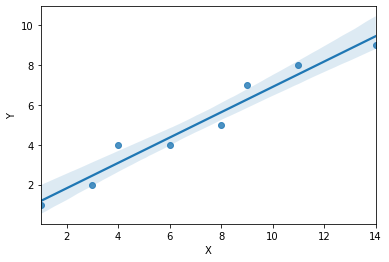

In [11]:
# your code here
sns.regplot(data=ironbeers_df, x="X", y="Y")

In [17]:
# your comments here
"""
The more people you tell to stay, they more they do. Perfect correlation between them
"""

'\nThe more people you tell to stay, they more they do. Perfect correlation between them\n'

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [12]:
# your code here
slope_intercept_calculator(ironbeers_df["X"], ironbeers_df["Y"])

(0.6363636363636364, 0.5454545454545459)

In [19]:
# your comments here
"""
Positive slope as the people staying goes up when you talk to more people
"""

'\nPositive slope as the people staying goes up when you talk to more people\n'

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here
"""
People loves to stay on Friday if I told them!
"""

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [16]:
# Slope is stored in index 0, Intercept in index 1
slope_intercept = slope_intercept_calculator(ironbeers_df["X"], ironbeers_df["Y"])

In [29]:
# your code here
ironbeers_df["expected_Y"] = [(slope_intercept[1] + x*slope_intercept[0]) for x in ironbeers_df["X"]]
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.181818,-0.18
1,3,2,2.454545,-0.45
2,4,4,3.090909,0.91
3,6,4,4.363636,-0.36
4,8,5,5.636364,-0.64
5,9,7,6.272727,0.73
6,11,8,7.545455,0.45
7,14,9,9.454545,-0.45


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [30]:
# your code here
ironbeers_df["error"] = ironbeers_df["Y"] - ironbeers_df["expected_Y"]
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,4,4,3.090909,0.909091
3,6,4,4.363636,-0.363636
4,8,5,5.636364,-0.636364
5,9,7,6.272727,0.727273
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


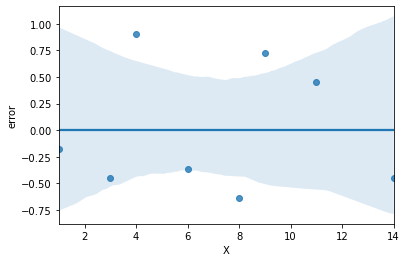

In [33]:
sns.regplot(data=ironbeers_df, x="X", y="error")
plt.show()

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here
"""
The points that have errors have higher numbers than 0.5 or -0.5
"""

#### 4.- Remove the points with a high error and recalculate the regression line.

In [39]:
# your code here
ironbeers_df.drop(ironbeers_df[ironbeers_df.error > 0.5].index, inplace=True)
ironbeers_df.drop(ironbeers_df[ironbeers_df.error < -0.5].index, inplace=True)

In [40]:
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
3,6,4,4.363636,-0.363636
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


#### 5.- Calculate the correlation. What is happening? Comment the result.

In [41]:
# your code here
covariance_correlation_calculatior(ironbeers_df["X"], ironbeers_df["Y"])

(19.25, 0.9945299478460592)

In [ ]:
# your comments here
"""
The covariance increased and the correlation now it's almost perfect.
"""